In [2]:
import nfl_power
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
scores = nfl_power.load_schedule(2023)
scores = pd.concat(
    [
        scores[["home_team", "home_score"]].rename(
            {"home_team": "team", "home_score": "points"}, axis="columns"
        ),
        scores[["away_team", "away_score"]].rename(
            {"away_team": "team", "away_score": "points"}, axis="columns"
        ),
    ]
)

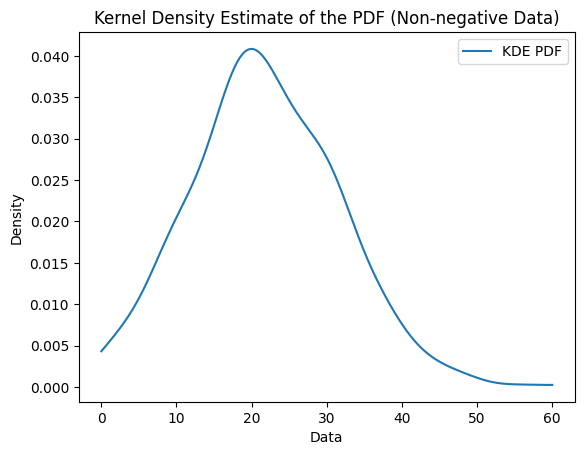

In [15]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

kde = gaussian_kde(scores["points"], bw_method='silverman')  # You can experiment with bandwidth methods

# Create a grid of values to evaluate the PDF over (ensure it starts from zero)
x_grid = np.linspace(0, 60, 1000)

# Evaluate the KDE on the grid to get the PDF
pdf = kde(x_grid)

# Clip the PDF to avoid negative values (although it's unlikely with KDE, this ensures we avoid issues)
pdf = np.maximum(pdf, 0)  # Ensures the PDF doesn't go negative

# Plot the PDF
plt.plot(x_grid, pdf, label='KDE PDF')
plt.title('Kernel Density Estimate of the PDF (Non-negative Data)')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

$$
y_1=f(X_1) \\
y_2=f(X_2) \\
\min{\sum[(y_1-y_2)-(f(X_1)-f(X_2))]^2} \\
\min{\sum(\Delta P-(E[P_1]-E[P_2]))^2} \\
P_1=10,\quad P_2=20 \quad\Rightarrow\quad 10-(E[P_1]-E[P_2]) \\
S_H-S_A+HA=f(X_H)-f(X_A) \\
S_H-S_A+HA=f(X_H-X_A)
$$
